# Housing Unit Inventory Workflow

Functions to obtain and clean data required for the v0.1.0 Housing Unit Inventory. 
The workflow  replicates the original alpha version 
of Housing Unit Inventory workflow in Python using Census API. 

The workflow also expands the Housing Unit Inventory to include
household income based on family and non-family income distributions 
by race and ethnicity.

For the original Alpha Release of the housing unit inventory 
process and example applications see:

Rosenheim, Nathanael (2021) “Detailed Household and Housing Unit Characteristics: 
Alpha Release of Housing Unit Inventories.” DesignSafe-CI. 
https://doi.org/10.17603/ds2-jwf6-s535.

The 2010 Census Data provides detailed household and housing unit, 
level characteristics at the census block level. 

The 2012 5-year American Community Survey provides detailed 
household level characteristics at the census tract level.

## Description of Program
- program:    ICD_1av1_run_HUI_v010_workflow
- task:       Obtain and clean data for Housing Unit Inventory.
- See github commits for description of program updates
- Current Version:    2022-02-01
- project:    Interdependent Networked Community Resilience Modeling Environment (IN-CORE)'}, Subtask 5.2 - Social Institutions
- funding:	  NIST Financial Assistance Award Numbers: 70NANB15H044 and 70NANB20H008 
- author:     Nathanael Rosenheim

- Suggested Citation:
Rosenheim, N. (2022)

### Setup notebook environment to access Cloned Github Package
This notebook uses packages that are in development. The packages are available at:

https://github.com/npr99/

To replicate this notebook Clone the Github Package to a folder that is a sibling of this notebook.

To access the sibling package you will need to append the parent directory ('..') to the system path list.

In [1]:
import numpy as np
import pandas as pd
import os # For saving output to path
import sys

In [2]:
# to access new package that is in a sibling folder - the system path list needs to include the parent folder (..)'},
# append the path of the directory that includes the github repository.
github_code_path  = "..\\github_com\\npr99\\Population_Inventory"
sys.path.append(github_code_path)

In [3]:
os.getcwd()

'g:\\Shared drives\\HRRC_IN-CORE\\Tasks\\M5.2-01 Pop inventory\\WorkNPR'

In [4]:
# To reload submodules need to use this magic command to set autoreload on
%load_ext autoreload
%autoreload 2
# open, read, and execute python program with reusable commands
from pyincore_data_addons.SourceData.api_census_gov.acg_05a_hui_functions \
    import hui_workflow_functions
from pyincore_data_addons.ICD00b_directory_design import directory_design
from pyincore_data_addons.ICD06c_Codebook import *
from pyincore_data_addons.ICD06b_Figures import *

from pyincore_data_addons.SourceData.api_census_gov.acg_00e_incore_huiv010 \
    import incore_v010_DataStructure

In [5]:
version = '0.1.0'
version_text = 'v0-1-0'

# Save Outputfolder - due to long folder name paths output saved to folder with shorter name
# files from this program will be saved with the program name - 
# this helps to follow the overall workflow
outputfolder = "ICD_workflow_2022-02-23"
# Make directory to save output
if not os.path.exists(outputfolder):
    os.mkdir(outputfolder)

communities = {'Lumberton_NC' : {
                    'community_name' : 'Lumberton, NC',
                    'counties' : { 
                        1 : {'FIPS Code' : '37155', 'Name' : 'Robeson County, NC'}}},                   
                'Shelby_TN' : {
                    'community_name' : 'Memphis, TN',
                    'counties' : { 
                        1 : {'FIPS Code' : '47157', 'Name' : 'Shelby County, TN'}}},
                'Joplin_MO' : {
                    'community_name' : 'Joplin, MO',
                    'counties' : { 
                        1 : {'FIPS Code' : '29097', 'Name' : 'Jasper County, MO'},
                        2 : {'FIPS Code' : '29145', 'Name' : 'Newton County, MO'}}},
                'Seaside_OR' : {
                    'community_name' : 'Seaside, OR',
                    'counties' : { 
                        1 : {'FIPS Code' : '41007', 'Name' : 'Clatsop County, OR'}}},                   
                'Galveston_TX' : {
                    'community_name' : 'Galveston, TX',
                    'counties' : { 
                        1 : {'FIPS Code' : '48167', 'Name' : 'Galveston County, TX'}}},                   
                'Oceana_MI' : {
                    'community_name' : 'Pentwater, MI',
                    'counties' : { 
                        1 : {'FIPS Code' : '26127', 'Name' : 'Oceanna County, MI'}}},
                'Brazos_TX' : {
                    'community_name' : 'College Station-Bryan, TX',
                    'counties' : { 
                        1 : {'FIPS Code' : '48041', 'Name' : 'Brazos County, TX'}}},
                'Mobile_AL' : {
                    'community_name' : 'Mobile, AL',
                    'counties' : { 
                        1 : {'FIPS Code' : '01097', 'Name' : 'Mobile County, AL'}}}                    
                }

"""
communities = {'Dallas_TX' : {
                    'community_name' : 'Dallas, TX',
                    'counties' : { 
                        1 : {'FIPS Code' : '48113', 'Name' : 'Dallas County, TX'}}}}

communities = {'Centralia_IL' : {
                    'community_name' : 'Centralia, IL',
                    'counties' : { 
                        1 : {'FIPS Code' : '17081', 'Name' : 'Jefferson County, IL'},
                        2 : {'FIPS Code' : '17121', 'Name' : 'Marion County, IL'},
                        3 : {'FIPS Code' : '17027', 'Name' : 'Clinton County, IL'},
                        4 : {'FIPS Code' : '17189', 'Name' : 'Washington County, IL'}
                        }}}
"""
communities = {'Lumberton_NC' : {
                    'community_name' : 'Lumberton, NC',
                    'counties' : { 
                        1 : {'FIPS Code' : '37155', 'Name' : 'Robeson County, NC'}}}}

# Set random seed for reproducibility
seed = 1000
basevintage = 2010


Setting up Housing Unit Inventory for Lumberton, NC
Robeson County, NC : county FIPS Code 37155

***************************************
    Version control - list of installed packages
***************************************

# packages in environment at C:\Users\nathanael99\Miniconda3\envs\pyincoreEnv20220106:
#
# Name                    Version                   Build  Channel
affine                    2.3.0                      py_0    conda-forge
argon2-cffi               21.3.0             pyhd8ed1ab_0    conda-forge
argon2-cffi-bindings      21.2.0           py38h294d835_1    conda-forge
asttokens                 2.0.5              pyhd8ed1ab_0    conda-forge
atomicwrites              1.4.0              pyh9f0ad1d_0    conda-forge
attrs                     21.4.0             pyhd8ed1ab_0    conda-forge
backcall                  0.2.0              pyh9f0ad1d_0    conda-forge
backports                 1.0                        py_2    conda-forge
backports.functools_lru_cache 1.6

INFO - fpdf.py:_substitute_page_number() - Substitution of '{nb}' was performed in the document


Saving codebook to ICD_workflow_2022-02-23/RobesonCounty_NC/hui_v0-1-0_Lumberton_NC_2010_rs1000.pdf


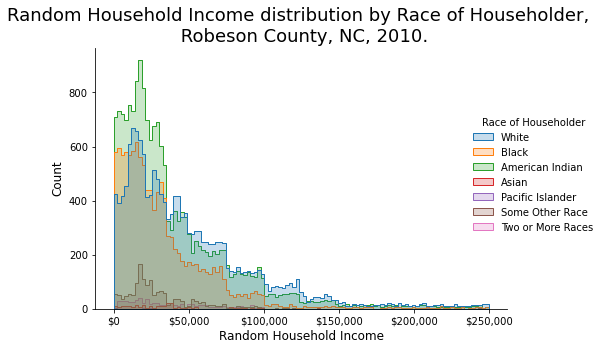

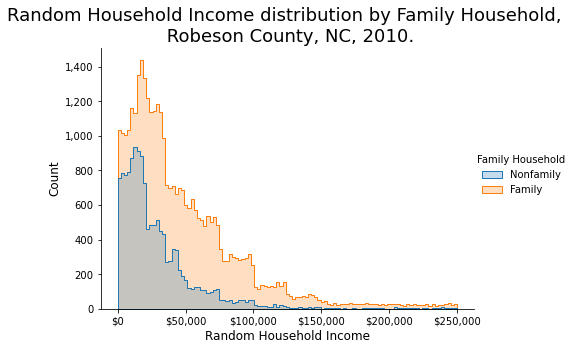

In [6]:
for community in communities.keys():
    # Create empty container to store outputs for in-core
    # Will use these to combine multiple counties
    hui_incore_county_df = {}
    print("Setting up Housing Unit Inventory for",communities[community]['community_name'])
    for county in communities[community]['counties'].keys():
        state_county = communities[community]['counties'][county]['FIPS Code']
        state_county_name  = communities[community]['counties'][county]['Name']
        print(state_county_name,': county FIPS Code',state_county)
    
        outputfolders = directory_design(state_county_name = state_county_name,
                                            outputfolder = outputfolder)
                                            
        generate_df = hui_workflow_functions(
            state_county = state_county,
            state_county_name= state_county_name,
            seed = seed,
            version = version,
            version_text = version_text,
            basevintage = basevintage,
            outputfolder = outputfolder,
            outputfolders = outputfolders)

        # Generate base housing unit inventory
        base_hui_df = generate_df.run_hui_workflow()
        hui_df = generate_df.final_polish_hui(base_hui_df['primary'])

        # Save version for IN-CORE in v0.1.0 format
        hui_incore_county_df[state_county] = \
            generate_df.save_incore_version010(hui_df)

    # combine multiple counties
    hui_incore_df = pd.concat(hui_incore_county_df.values(), 
                                    ignore_index=True, axis=0)

    # Remove .0 from data
    hui_incore_df_fixed = hui_incore_df.applymap(lambda cell: int(cell) if str(cell).endswith('.0') else cell)

    #Save results for community name
    output_filename = f'hui_v0-1-0_{community}_{basevintage}_rs{seed}'
    csv_filepath = outputfolders['top']+"/"+output_filename+'.csv'
    savefile = sys.path[0]+"/"+csv_filepath
    hui_incore_df_fixed.to_csv(savefile, index=False)

    # Save second set of files in common directory
    common_directory = outputfolders['top']+"/../"+output_filename
    hui_incore_df_fixed.to_csv(common_directory+'.csv', index=False)
    
    # Generate figures for explore data
    for by_var in ["race","hispan","family"]:
        income_by_var_figure = income_distribution(input_df = hui_incore_df,
                        variable = "randincome",
                        by_variable = by_var,
                        datastructure = incore_v010_DataStructure,
                        communities= communities,
                        community = community,
                        year = basevintage,
                        outputfolders = outputfolders)

    # Paths for codebook text
    sourcedata_filepath = "pyincore_data_addons\\SourceData\\api_census_gov"
    keyterms_filepath = github_code_path+'\\'+sourcedata_filepath+ \
            '\\'+"acg_00a_keyterms.md"

    projectoverview_filepath = github_code_path+'\\pyincore_data_addons\\'+ \
            "ICD00a_projectoverview.md"

    # Create PDF Codebook
    pdfcodebook = codebook(input_df = hui_incore_df_fixed,
            datastructure = incore_v010_DataStructure,
            projectoverview = projectoverview_filepath,
            keyterms = keyterms_filepath,
            communities = communities,
            community = community,
            year = basevintage,
            output_filename = output_filename,
            outputfolders = outputfolders,
            image_path = 'IN-CORE_HRRC_CodebookBanner.png')
    pdf_codebook = pdfcodebook.create_codebook()



In [7]:
hui_incore_df.head()

huid          blockid          bgid      tractid  \
0  B371559601011003H001  371559601011003  371559601011  37155960101   
1  B371559601011005H001  371559601011005  371559601011  37155960101   
2  B371559601011006H001  371559601011006  371559601011  37155960101   
3  B371559601011006H002  371559601011006  371559601011  37155960101   
4  B371559601011007H006  371559601011007  371559601011  37155960101   

  FIPScounty  numprec ownershp race hispan family vacancy gqtype incomegroup  \
0      37155        1      1.0  1.0    0.0    0.0     0.0    0.0         1.0   
1      37155        1      1.0  1.0    0.0    0.0     0.0    0.0         3.0   
2      37155        1      1.0  1.0    0.0    0.0     0.0    0.0         1.0   
3      37155        1      1.0  1.0    0.0    0.0     0.0    0.0         2.0   
4      37155        1      2.0  1.0    0.0    0.0     0.0    0.0         5.0   

  hhinc  randincome poverty  
0   1.0      9651.0     1.0  
1   2.0     19695.0     0.0  
2   1.0      6215.0     1.0  
3   1.0     13776.0     0.0  
4   3.0     27398.0     0.0